In [5]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
    con = sqlite3.connect("output/portfolios.sqlite")
    df = pd.read_sql_query("""
      SELECT *
      FROM portfolios
      WHERE num_assets < 2
      ORDER BY num_assets DESC
    """, con)
    con.close()

df.head(3)

,assets,num_assets,num_years,avg_return,baseline_lt_return,baseline_st_return,pwr30,swr30,std_dev,ulcer_score,deepest_drawdown,longest_drawdown,startdate_sensitivity,pwr10,pwr10_stdev,pwr10_slope,pwr30_stdev,pwr30_slope
0,|Commodity Futures|Dividend Growth|Emerging|,3,37,0.086061,0.021635,-0.004766,0.053846,0.070157,0.158817,24.928673,-0.423008,13.0,0.124325,-0.011753,0.040267,-0.440639,0.017944,-0.743239
1,|Commodity Futures|Dividend Growth|Energy|,3,37,0.074543,0.015437,-0.040030,0.052719,0.072491,0.150464,64.167448,-0.389945,14.0,0.152440,-0.021141,0.038138,-0.403141,0.013349,-0.549989
2,|Commodity Futures|Dividend Growth|Europe|,3,37,0.078025,0.011418,-0.018718,0.049108,0.066474,0.140541,27.685240,-0.396069,13.0,0.107405,-0.015345,0.037169,-0.404227,0.017366,-0.701678


<AxesSubplot:xlabel='startdate_sensitivity', ylabel='pwr30'>

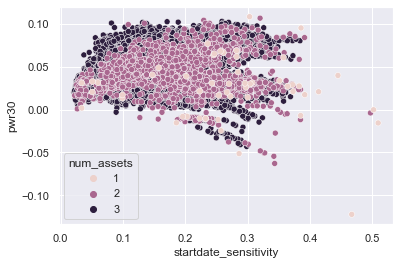

In [6]:
import seaborn as sns
sns.set()
sns.scatterplot(y=df['pwr30'], x=df['startdate_sensitivity'], hue=df['num_assets'])

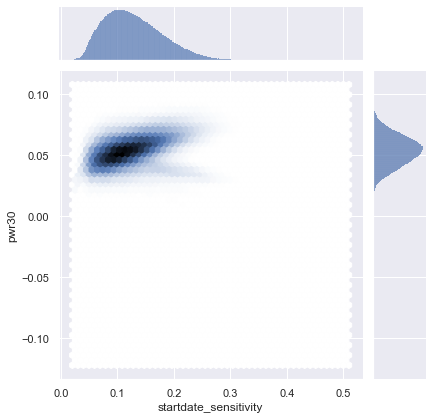

In [11]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
  SELECT *
  FROM portfolios
  -- WHERE num_assets < 5
  ORDER BY num_assets DESC
""", con)
con.close()
sns.jointplot(y=df['pwr30'], x=df['startdate_sensitivity'], kind='hex')

In [18]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
  SELECT *
  FROM portfolios
  WHERE num_assets < 6
  ORDER BY num_assets DESC
""", con)
con.close()
df.describe()

,num_assets,num_years,avg_return,baseline_lt_return,baseline_st_return,pwr30,swr30,std_dev,ulcer_score,deepest_drawdown,longest_drawdown,startdate_sensitivity,pwr10,pwr10_stdev,pwr10_slope,pwr30_stdev,pwr30_slope
count,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06,3.187367e+06
mean,4.892067e+00,4.121024e+01,7.493289e-02,4.409583e-02,1.731318e-02,5.383322e-02,6.615142e-02,1.110779e-01,5.156585e+00,-2.469625e-01,3.966156e+00,1.286432e-01,1.547280e-02,2.130234e-02,-1.254520e-01,9.562236e-03,-1.532822e-01
std,3.373078e-01,6.392091e+00,1.539427e-02,1.086921e-02,1.485872e-02,1.253221e-02,1.032560e-02,2.449994e-02,4.915889e+00,9.275372e-02,2.076484e+00,5.073877e-02,1.350985e-02,5.875748e-03,6.136318e-02,3.818953e-03,1.510932e-01
min,1.000000e+00,3.700000e+01,2.669543e-03,-5.321621e-02,-1.464048e-01,-1.220366e-01,1.237461e-02,2.605570e-02,2.533137e-01,-9.201837e-01,1.000000e+00,2.041885e-02,-1.879766e-01,4.193933e-03,-5.120559e-01,2.127587e-03,-1.010587e+00
25%,5.000000e+00,3.700000e+01,6.440894e-02,3.745948e-02,8.049986e-03,4.525260e-02,5.945624e-02,9.419201e-02,2.544047e+00,-3.111008e-01,3.000000e+00,8.975725e-02,7.329767e-03,1.708092e-02,-1.622283e-01,6.610949e-03,-2.425586e-01
50%,5.000000e+00,3.700000e+01,7.500802e-02,4.442537e-02,1.914844e-02,5.411998e-02,6.636524e-02,1.106162e-01,3.942706e+00,-2.443465e-01,4.000000e+00,1.224183e-01,1.630827e-02,2.112917e-02,-1.285220e-01,8.908047e-03,-1.331185e-01
75%,5.000000e+00,4.400000e+01,8.562297e-02,5.125028e-02,2.808048e-02,6.244878e-02,7.308705e-02,1.276151e-01,6.192452e+00,-1.806349e-01,5.000000e+00,1.615946e-01,2.479636e-02,2.528402e-02,-9.287542e-02,1.187678e-02,-4.841779e-02
max,5.000000e+00,1.510000e+02,1.437484e-01,8.951781e-02,6.855558e-02,1.080726e-01,1.126616e-01,3.264167e-01,3.973373e+02,-2.215655e-02,6.500000e+01,5.097261e-01,6.781883e-02,6.992212e-02,2.068144e-01,5.979752e-02,3.979108e-01


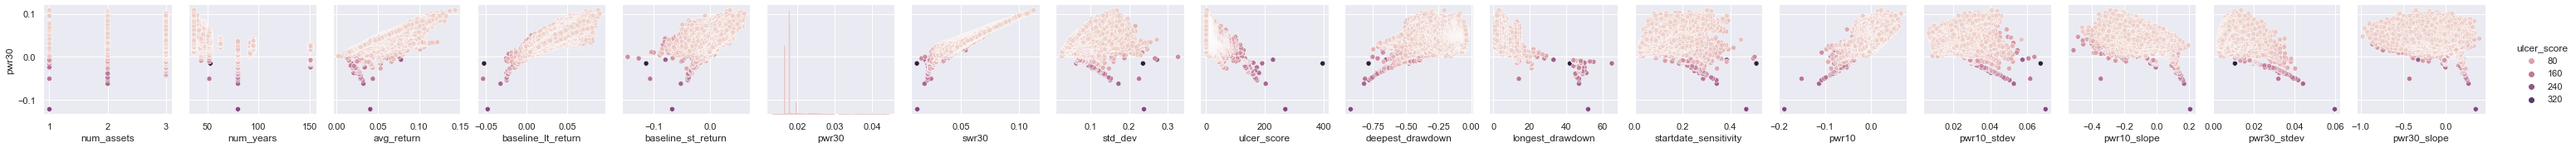

In [26]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
  SELECT *
  FROM portfolios
  WHERE num_assets < 4
  ORDER BY ulcer_score DESC
""", con)
con.close()
sns.pairplot(df, y_vars=['pwr30'], x_vars=df.columns.values[1:], hue='ulcer_score')

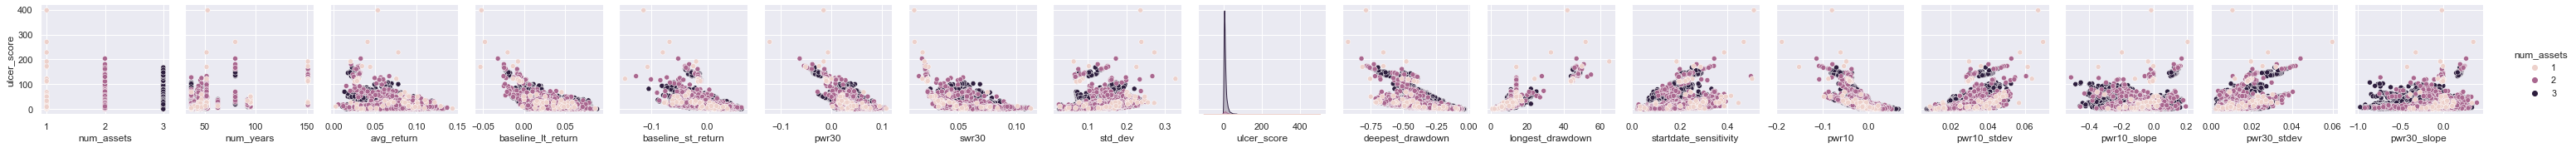

In [23]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
  SELECT *
  FROM portfolios
  WHERE num_assets < 4
  ORDER BY num_assets DESC
""", con)
con.close()
sns.pairplot(df, y_vars=['ulcer_score'], x_vars=df.columns.values[1:], hue='num_assets')

<AxesSubplot:xlabel='ulcer_score', ylabel='baseline_lt_return'>

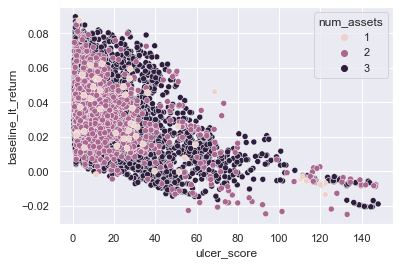

In [35]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
  SELECT *
  FROM portfolios
  WHERE num_assets < 4
    AND ulcer_score < 150
  ORDER BY num_assets DESC
""", con)
con.close()
sns.scatterplot(x=df['ulcer_score'], y=df['baseline_lt_return'], hue=df['num_assets'])

<AxesSubplot:xlabel='ulcer_score', ylabel='baseline_lt_return'>

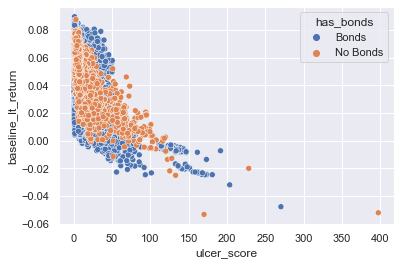

In [44]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
    WITH portfolios_with_has_bonds AS (
        SELECT *,
               CASE
                   WHEN
                          INSTR(assets, '|LT STRIPS|') > 0
                       OR INSTR(assets, '|T-Bill|') > 0
                       OR INSTR(assets, '|LTT|') > 0
                       OR INSTR(assets, '|IT Corp|') > 0
                       OR INSTR(assets, '|ITB|') > 0
                       OR INSTR(assets, '|ITT|') > 0
                       OR INSTR(assets, '|TBM|') > 0
                       OR INSTR(assets, '|STT|') > 0
                       OR INSTR(assets, '|STB|') > 0
                       OR INSTR(assets, '|SCB|') > 0
                       OR INSTR(assets, '|IT Munis|') > 0
                       OR INSTR(assets, '|LT Munis|') > 0
                       OR INSTR(assets, '|ST Munis|') > 0
                       OR INSTR(assets, '|Extended Mkt|') > 0
                       OR INSTR(assets, '|ST Invest. Grade|') > 0
                       OR INSTR(assets, '|TIPS|') > 0
                       OR INSTR(assets, '|Hi-Yield Corp Bd|') > 0
                       OR INSTR(assets, 'Int''l Bd|') > 0
                       OR INSTR(assets, '|Global Bd|') > 0
                       THEN 'Bonds'
                   WHEN TRUE THEN 'No Bonds'
               END AS has_bonds
        FROM portfolios
    )
    SELECT *
    FROM portfolios_with_has_bonds
    WHERE num_assets < 4
    ORDER BY has_bonds ASC
""", con)
con.close()
sns.scatterplot(x=df['ulcer_score'], y=df['baseline_lt_return'], hue=df['has_bonds'])

<AxesSubplot:xlabel='ulcer_score', ylabel='baseline_lt_return'>

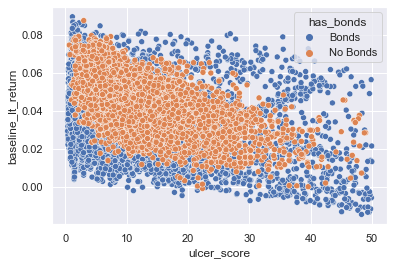

In [46]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
    WITH portfolios_with_has_bonds AS (
        SELECT *,
               CASE
                   WHEN
                          INSTR(assets, '|LT STRIPS|') > 0
                       OR INSTR(assets, '|T-Bill|') > 0
                       OR INSTR(assets, '|LTT|') > 0
                       OR INSTR(assets, '|IT Corp|') > 0
                       OR INSTR(assets, '|ITB|') > 0
                       OR INSTR(assets, '|ITT|') > 0
                       OR INSTR(assets, '|TBM|') > 0
                       OR INSTR(assets, '|STT|') > 0
                       OR INSTR(assets, '|STB|') > 0
                       OR INSTR(assets, '|SCB|') > 0
                       OR INSTR(assets, '|IT Munis|') > 0
                       OR INSTR(assets, '|LT Munis|') > 0
                       OR INSTR(assets, '|ST Munis|') > 0
                       OR INSTR(assets, '|Extended Mkt|') > 0
                       OR INSTR(assets, '|ST Invest. Grade|') > 0
                       OR INSTR(assets, '|TIPS|') > 0
                       OR INSTR(assets, '|Hi-Yield Corp Bd|') > 0
                       OR INSTR(assets, 'Int''l Bd|') > 0
                       OR INSTR(assets, '|Global Bd|') > 0
                       THEN 'Bonds'
                   WHEN TRUE THEN 'No Bonds'
               END AS has_bonds
        FROM portfolios
    )
    SELECT *
    FROM portfolios_with_has_bonds
    WHERE num_assets < 4
      AND ulcer_score < 50
    ORDER BY has_bonds ASC
""", con)
con.close()
sns.scatterplot(x=df['ulcer_score'], y=df['baseline_lt_return'], hue=df['has_bonds'])

<AxesSubplot:xlabel='ulcer_score', ylabel='baseline_lt_return'>

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


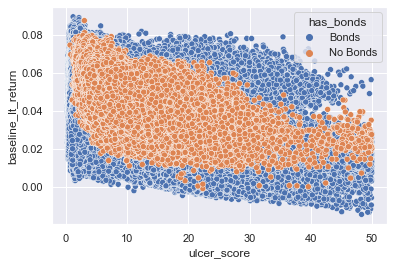

In [47]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
    WITH portfolios_with_has_bonds AS (
        SELECT *,
               CASE
                   WHEN
                          INSTR(assets, '|LT STRIPS|') > 0
                       OR INSTR(assets, '|T-Bill|') > 0
                       OR INSTR(assets, '|LTT|') > 0
                       OR INSTR(assets, '|IT Corp|') > 0
                       OR INSTR(assets, '|ITB|') > 0
                       OR INSTR(assets, '|ITT|') > 0
                       OR INSTR(assets, '|TBM|') > 0
                       OR INSTR(assets, '|STT|') > 0
                       OR INSTR(assets, '|STB|') > 0
                       OR INSTR(assets, '|SCB|') > 0
                       OR INSTR(assets, '|IT Munis|') > 0
                       OR INSTR(assets, '|LT Munis|') > 0
                       OR INSTR(assets, '|ST Munis|') > 0
                       OR INSTR(assets, '|Extended Mkt|') > 0
                       OR INSTR(assets, '|ST Invest. Grade|') > 0
                       OR INSTR(assets, '|TIPS|') > 0
                       OR INSTR(assets, '|Hi-Yield Corp Bd|') > 0
                       OR INSTR(assets, 'Int''l Bd|') > 0
                       OR INSTR(assets, '|Global Bd|') > 0
                       THEN 'Bonds'
                   WHEN TRUE THEN 'No Bonds'
               END AS has_bonds
        FROM portfolios
    )
    SELECT *
    FROM portfolios_with_has_bonds
    WHERE num_assets < 6
      AND ulcer_score < 50
    ORDER BY has_bonds ASC
""", con)
con.close()
sns.scatterplot(x=df['ulcer_score'], y=df['baseline_lt_return'], hue=df['has_bonds'])

<AxesSubplot:xlabel='ulcer_score', ylabel='baseline_lt_return'>

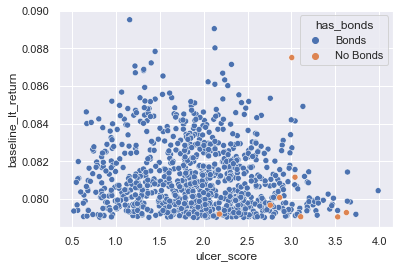

In [48]:
con = sqlite3.connect("output/portfolios.sqlite")
df = pd.read_sql_query("""
    WITH portfolios_with_has_bonds AS (
        SELECT *,
               CASE
                   WHEN
                          INSTR(assets, '|LT STRIPS|') > 0
                       OR INSTR(assets, '|T-Bill|') > 0
                       OR INSTR(assets, '|LTT|') > 0
                       OR INSTR(assets, '|IT Corp|') > 0
                       OR INSTR(assets, '|ITB|') > 0
                       OR INSTR(assets, '|ITT|') > 0
                       OR INSTR(assets, '|TBM|') > 0
                       OR INSTR(assets, '|STT|') > 0
                       OR INSTR(assets, '|STB|') > 0
                       OR INSTR(assets, '|SCB|') > 0
                       OR INSTR(assets, '|IT Munis|') > 0
                       OR INSTR(assets, '|LT Munis|') > 0
                       OR INSTR(assets, '|ST Munis|') > 0
                       OR INSTR(assets, '|Extended Mkt|') > 0
                       OR INSTR(assets, '|ST Invest. Grade|') > 0
                       OR INSTR(assets, '|TIPS|') > 0
                       OR INSTR(assets, '|Hi-Yield Corp Bd|') > 0
                       OR INSTR(assets, 'Int''l Bd|') > 0
                       OR INSTR(assets, '|Global Bd|') > 0
                       THEN 'Bonds'
                   WHEN TRUE THEN 'No Bonds'
               END AS has_bonds
        FROM portfolios
    )
    SELECT *
    FROM portfolios_with_has_bonds
    WHERE num_assets < 6
      AND ulcer_score < 4
      AND baseline_lt_return > 0.079
    ORDER BY has_bonds ASC
""", con)
con.close()
sns.scatterplot(x=df['ulcer_score'], y=df['baseline_lt_return'], hue=df['has_bonds'])